<b>Let me know your thoughts in the comments! Do you like this approach, or do you have any advice for improvement? Your feedback helps a lot!"<b/>

 If you have more ways to handle categorical data, I'd love to learn from you!

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.shape

(3900, 19)

In [4]:
df.drop(['Customer ID'], axis=1,inplace=True)

In [5]:
male_df = df[df['Gender']=='Male']
female_df = df[df['Gender']=='Female']

# EDA

## Item Purchased

In [6]:
top_item_m = male_df['Item Purchased'].value_counts().reset_index()
top_item_f = female_df['Item Purchased'].value_counts().reset_index()
top_item = df['Item Purchased'].value_counts().reset_index()

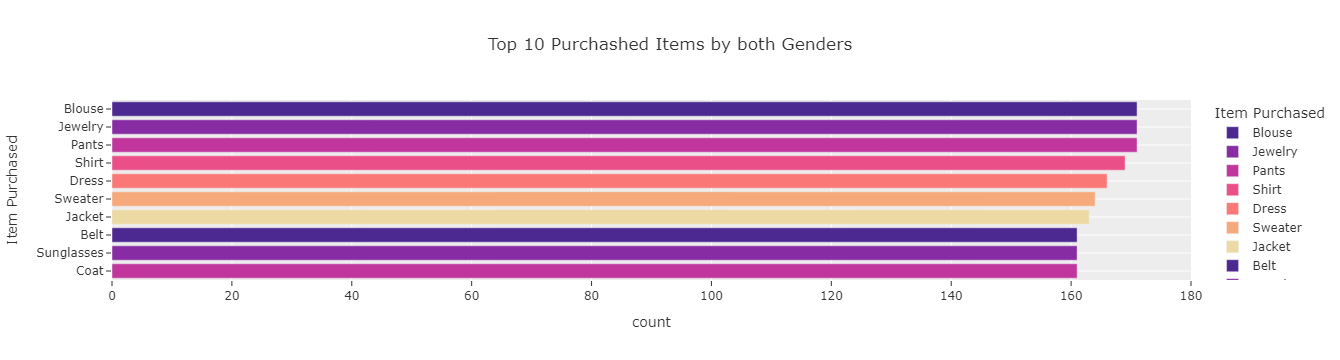

In [97]:
px.bar(top_item.head(10),y='Item Purchased',x='count',color = 'Item Purchased',color_discrete_sequence=px.colors.sequential.Agsunset , template ='ggplot2',orientation='h',title="Top 10 Purchashed Items by both Genders")

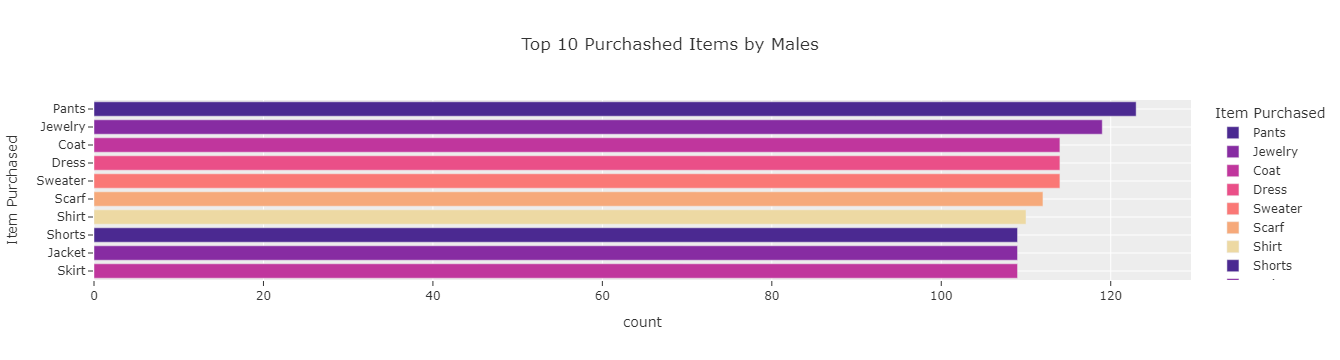

In [98]:
px.bar(top_item_m.head(10),y='Item Purchased',x='count',color = 'Item Purchased',color_discrete_sequence=px.colors.sequential.Agsunset , template ='ggplot2',orientation='h',title="Top 10 Purchashed Items by Males")

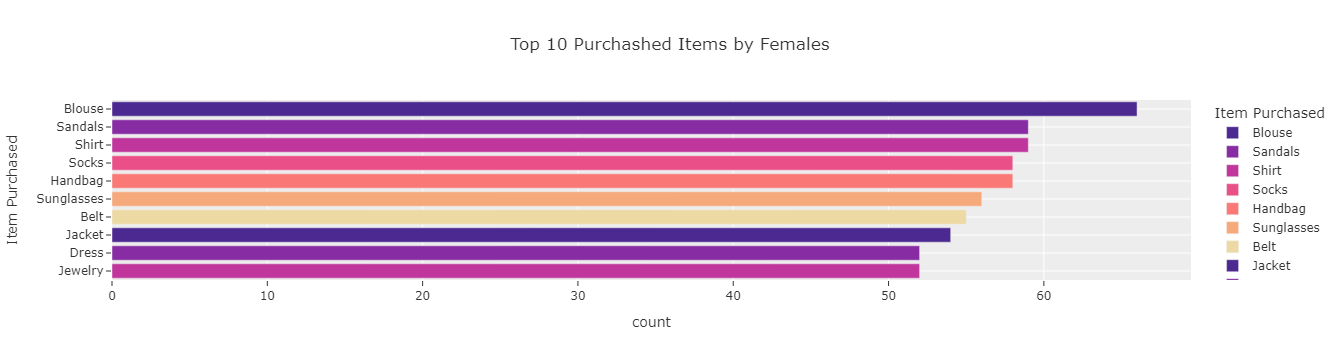

In [99]:
px.bar(top_item_f.head(10),y='Item Purchased',x='count',color = 'Item Purchased',color_discrete_sequence=px.colors.sequential.Agsunset , template ='ggplot2',orientation='h',title="Top 10 Purchashed Items by Females")

In [10]:
df['Size'].value_counts(),male_df['Size'].value_counts(),female_df['Size'].value_counts()

(Size
 M     1755
 L     1053
 S      663
 XL     429
 Name: count, dtype: int64,
 Size
 M     1165
 L      716
 S      476
 XL     295
 Name: count, dtype: int64,
 Size
 M     590
 L     337
 S     187
 XL    134
 Name: count, dtype: int64)

## Category

In [11]:
ctg_m = male_df["Category"].value_counts().reset_index()

ctg_f = female_df["Category"].value_counts().reset_index()
ctg = df["Category"].value_counts().reset_index()

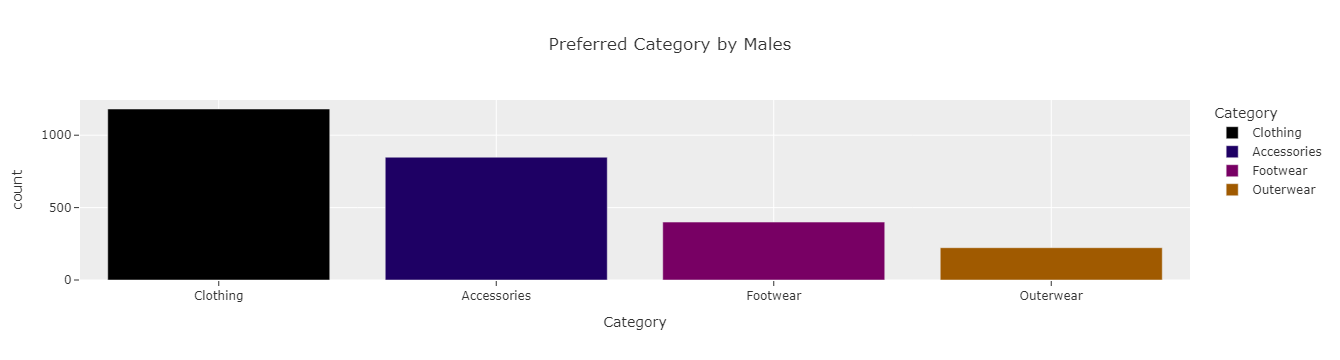

In [100]:
px.bar(ctg_m,x='Category',y='count',color='Category',color_discrete_sequence=px.colors.sequential.Electric,template='ggplot2',title="Preferred Category by Males",)

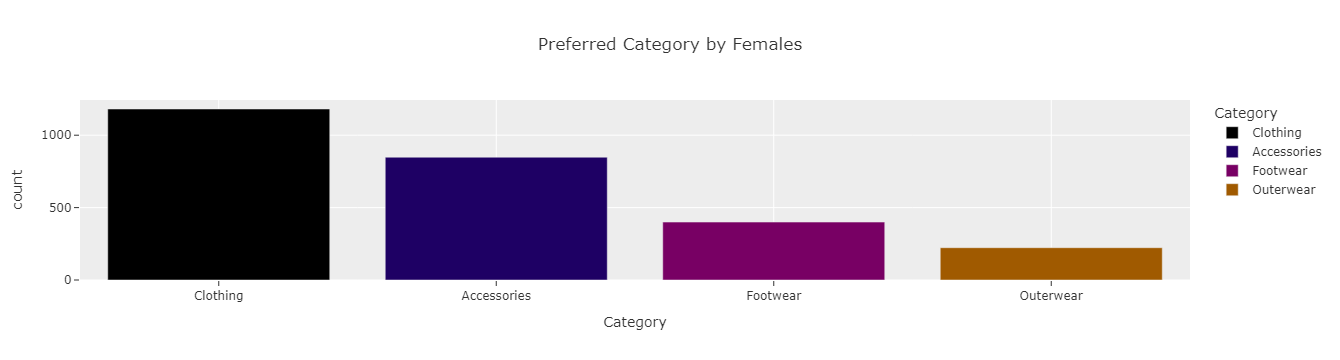

In [101]:
px.bar(ctg_m,x='Category',y='count',color='Category',color_discrete_sequence=px.colors.sequential.Electric,template='ggplot2',title="Preferred Category by Females")

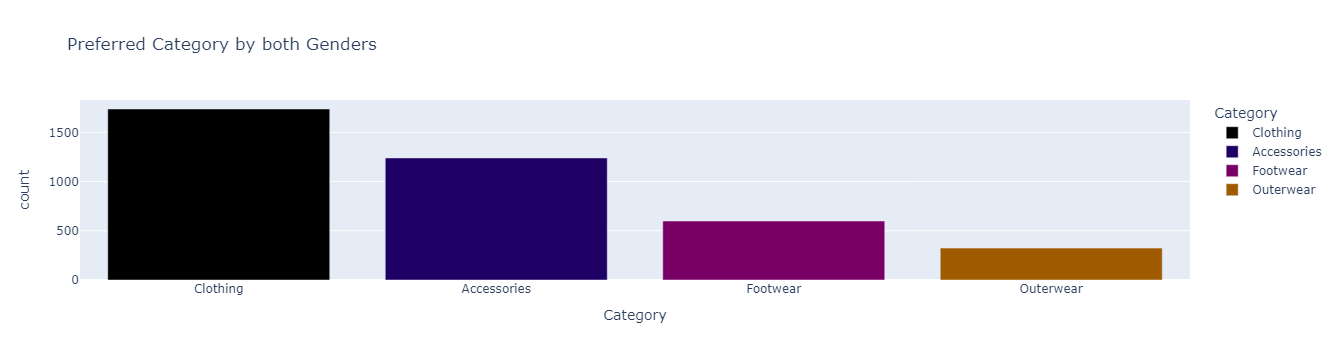

In [102]:
px.bar(ctg,x='Category',y='count',color='Category',color_discrete_sequence=px.colors.sequential.Electric,title="Preferred Category by both Genders")

In [15]:
waffle_data_m = dict(male_df['Category'].value_counts())
waffle_data_f = dict(female_df['Category'].value_counts())


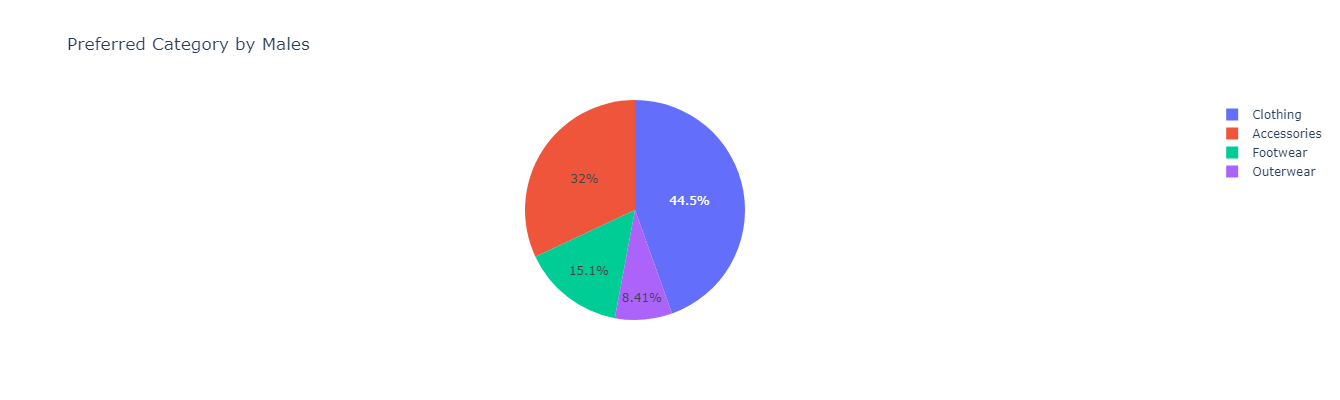

In [103]:
px.pie(values=waffle_data_m.values(),names=waffle_data_m.keys(),height=400,width=400,title="Preferred Category by Males")

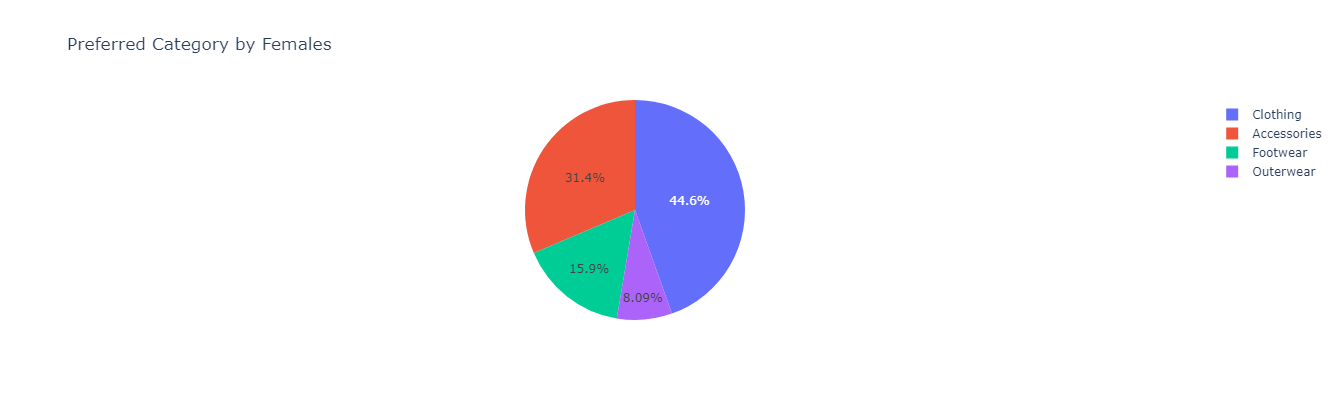

In [104]:
px.pie(values=waffle_data_f.values(),names=waffle_data_f.keys(),height=400,width=400,title="Preferred Category by Females")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

## Review ratings

In [20]:
cr_f = female_df[female_df['Category']=='Clothing']
avg_cr_f = cr_f['Review Rating'].mean()

cr_m = male_df[male_df['Category']=='Clothing']
avg_cr_m = cr_m['Review Rating'].mean()


In [21]:
avg_cr_m,avg_cr_f

(3.7319220999153258, 3.7044964028776977)

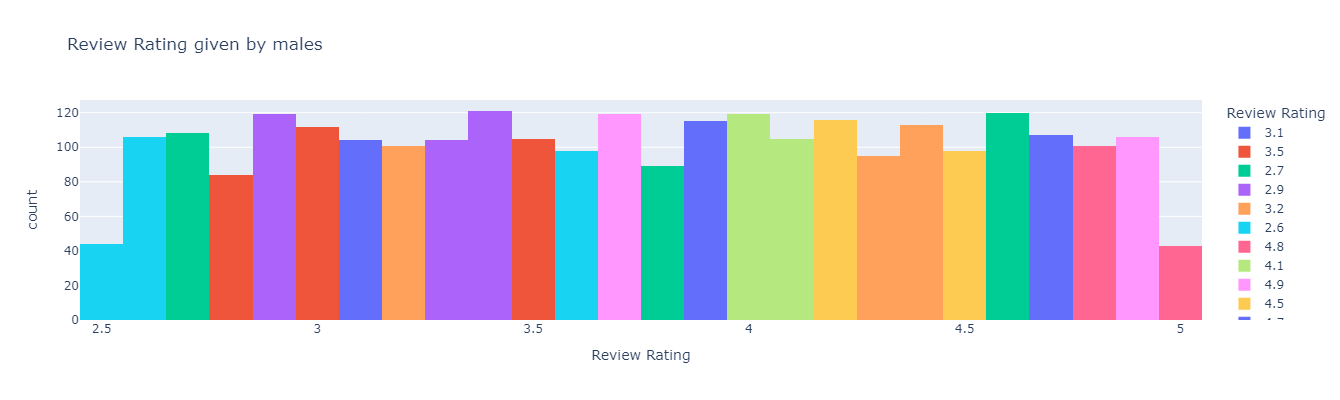

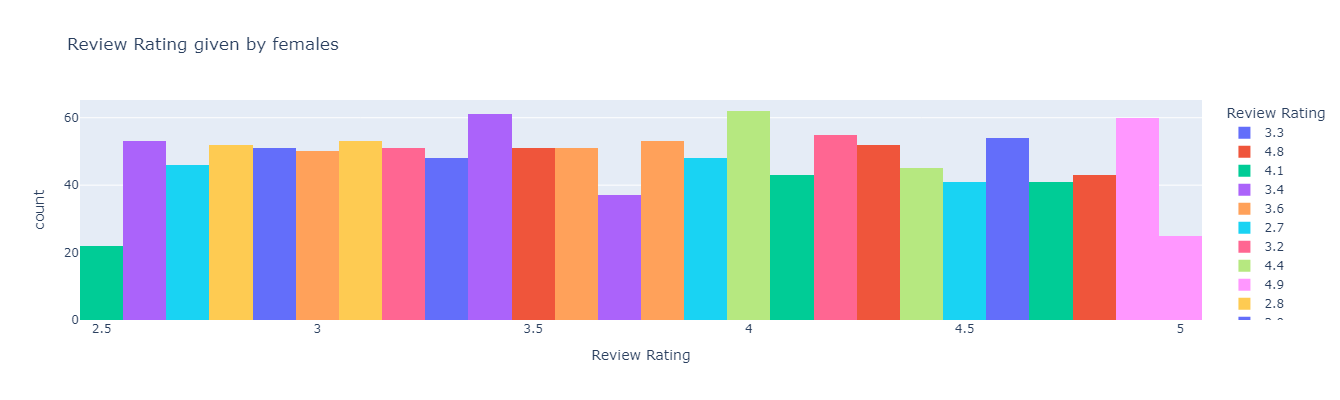

In [61]:
hist_fig1 = px.histogram(male_df,x='Review Rating',color='Review Rating',title="Review Rating given by males",height=400)
hist_fig2 = px.histogram(female_df,x='Review Rating',color='Review Rating',title="Review Rating given by females",height=400)
hist_fig1.show()
hist_fig2.show()

In [23]:
cr_m['Review Rating'].value_counts()

Review Rating
3.7    61
3.4    59
2.9    55
2.7    55
4.0    52
3.9    52
4.2    52
3.0    49
3.3    49
4.1    48
3.5    48
4.9    48
4.6    46
4.7    46
3.6    46
4.8    46
3.1    46
2.6    45
4.3    45
4.4    43
2.8    41
3.2    41
3.8    39
4.5    36
2.5    17
5.0    16
Name: count, dtype: int64

## Purchase Amount (USD)

In [24]:
m_tpa = male_df['Purchase Amount (USD)'].sum()
f_tpa = female_df['Purchase Amount (USD)'].sum()
m_tpa,f_tpa

(157890, 75191)

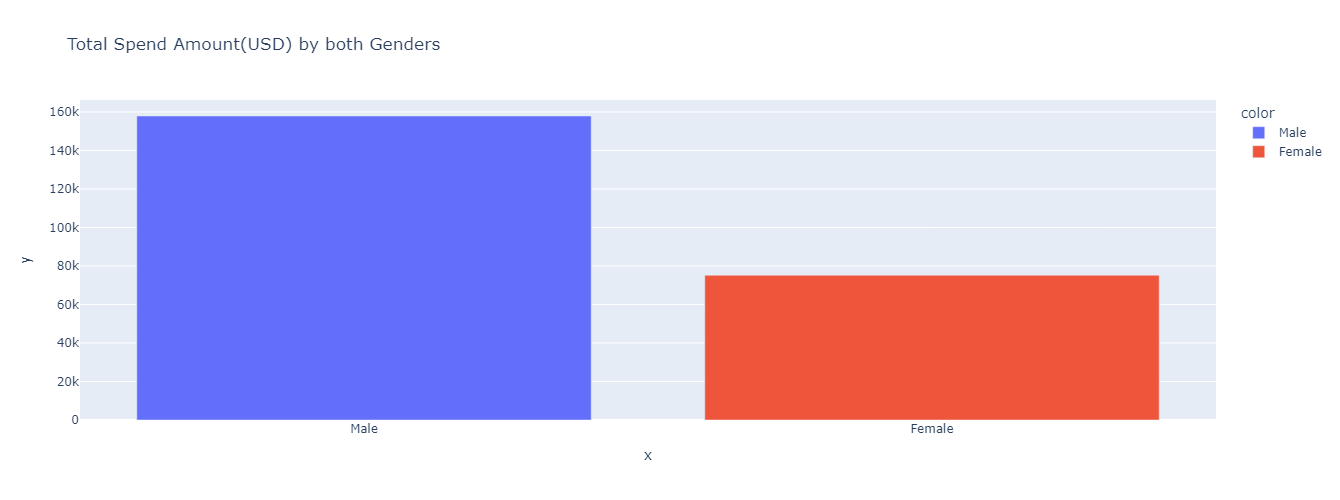

In [105]:
px.bar(x=["Male","Female"],y=[m_tpa,f_tpa],title="Total Spend Amount(USD) by both Genders",height=500,width=500,color=["Male","Female"])

In [26]:
# female
cc_f = cr_f
ca_f = female_df[female_df['Category']=='Accessories']
cf_f = female_df[female_df['Category']=='Footwear']
co_f = female_df[female_df['Category']=='Outerwear']
# male
cc_m = cr_m
ca_m = male_df[male_df['Category']=='Accessories']
cf_m = male_df[male_df['Category']=='Footwear']
co_m = male_df[male_df['Category']=='Outerwear']


In [27]:
# Clothing

bar_cc_total_fig1 = px.bar(x=["Male","Female"],y=[cc_m['Purchase Amount (USD)'].sum(),cc_f['Purchase Amount (USD)'].sum()],color=["Male","Female"])
bar_cc_avg_fig1 = px.bar(x=["Male","Female"],y=[cc_m['Purchase Amount (USD)'].mean(),cc_f['Purchase Amount (USD)'].mean()],color=["Male","Female"])

#Accessories

bar_ca_total_fig2 = px.bar(x=["Male","Female"],y=[ca_m['Purchase Amount (USD)'].sum(),ca_f['Purchase Amount (USD)'].sum()],color=["Male","Female"])
bar_ca_avg_fig2 = px.bar(x=["Male","Female"],y=[ca_m['Purchase Amount (USD)'].mean(),ca_f['Purchase Amount (USD)'].mean()],color=["Male","Female"])

# Footwear

bar_cf_total_fig3 = px.bar(x=["Male","Female"],y=[cf_m['Purchase Amount (USD)'].sum(),cf_f['Purchase Amount (USD)'].sum()],color=["Male","Female"])
bar_cf_avg_fig3 = px.bar(x=["Male","Female"],y=[cf_m['Purchase Amount (USD)'].mean(),cf_f['Purchase Amount (USD)'].mean()],color=["Male","Female"])

# Outerwear

bar_co_total_fig4 = px.bar(x=["Male","Female"],y=[co_m['Purchase Amount (USD)'].sum(),co_f['Purchase Amount (USD)'].sum()],color=["Male","Female"])
bar_co_avg_fig4 = px.bar(x=["Male","Female"],y=[co_m['Purchase Amount (USD)'].mean(),co_f['Purchase Amount (USD)'].mean()],color=["Male","Female"])

In [28]:
fig3 = make_subplots(
    rows=4,cols=2,subplot_titles=["Category: Clothing Total Purchase Amount","Category: Clothing Avg Purchase Amount",
                                  "Category: Accessories Total Purchase Amount","Category: Accessories Avg Purchase Amount",
                                  "Category: Footwear Total Purchase Amount","Category: Footwear Avg Purchase Amount",
                                  "Category: Outerwear Total Purchase Amount","Category: Outerwear Avg Purchase Amount"]
)

In [29]:
for trace in bar_cc_total_fig1['data']:
    fig3.add_trace(trace,row=1,col=1)

for trace in bar_cc_avg_fig1['data']:
    fig3.add_trace(trace,row=1,col=2)

for trace in bar_ca_total_fig2['data']:
    fig3.add_trace(trace,row=2,col=1)

for trace in bar_ca_avg_fig2['data']:
    fig3.add_trace(trace,row=2,col=2)

for trace in bar_cf_total_fig3['data']:
    fig3.add_trace(trace,row=3,col=1)

for trace in bar_cf_avg_fig3['data']:
    fig3.add_trace(trace,row=3,col=2)

for trace in bar_co_total_fig4['data']:
    fig3.add_trace(trace,row=4,col=1)

for trace in bar_co_avg_fig4['data']:
    fig3.add_trace(trace,row=4,col=2)

fig3.update_layout(
    title="Purchase Amount Comparsion",
    width=950,
    height=1300,
    showlegend=False
)

In [30]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [31]:
male_pm=male_df['Payment Method'].value_counts().reset_index()
px.bar(male_pm,y='Payment Method',x='count',title="Payment Method used for Shopping by Males",color='Payment Method',color_discrete_sequence=px.colors.sequential.Agsunset)

In [32]:
female_pm=female_df['Payment Method'].value_counts().reset_index()
px.bar(female_pm,y='Payment Method',x='count',title="Payment Method used for Shopping by Females",color='Payment Method',color_discrete_sequence=px.colors.sequential.Agsunset)

In [33]:
male_season=male_df['Season'].value_counts().reset_index()
px.bar(male_season,y='Season',x='count',title="Season In which males preferred to do shopping",color='Season',color_discrete_sequence=px.colors.sequential.Agsunset)

In [34]:
female_season=female_df['Season'].value_counts().reset_index()
px.bar(female_season,y='Season',x='count',title="Season In which females preferred to do shopping",color='Season',color_discrete_sequence=px.colors.sequential.Agsunset)

In [35]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [36]:
ss_m =dict(male_df['Subscription Status'].value_counts())
ss_f =dict(female_df['Subscription Status'].value_counts())
ss_f,ss_m

({'No': 1248}, {'No': 1599, 'Yes': 1053})

In [106]:
fig_pie1 = px.pie(values=ss_m.values(), names=ss_m.keys(),height=400,width=400,title="Shopping Subscription taken by Males")
fig_pie2 = px.pie(values=ss_f.values(), names=ss_f.keys(),height=400,width=400,title="Shopping Subscription taken by Females")

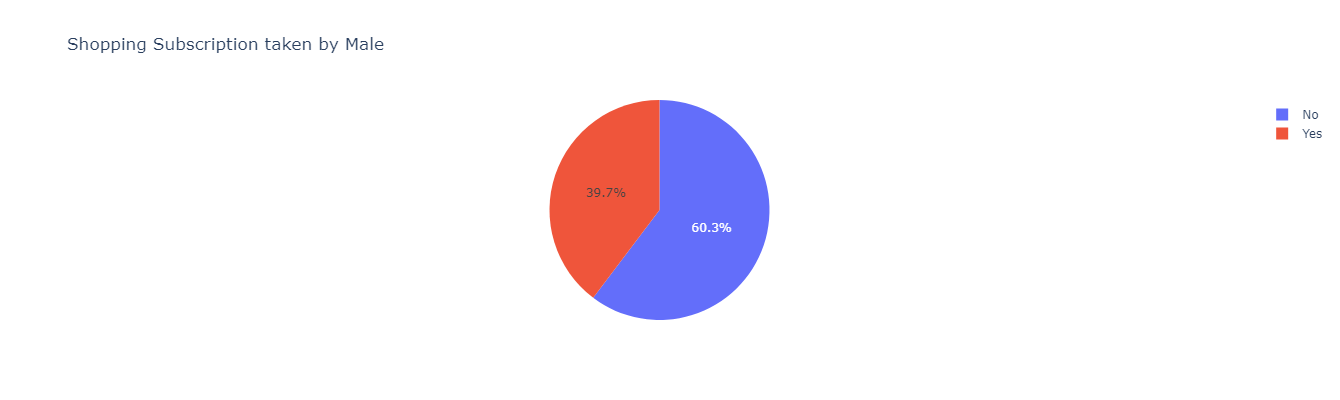

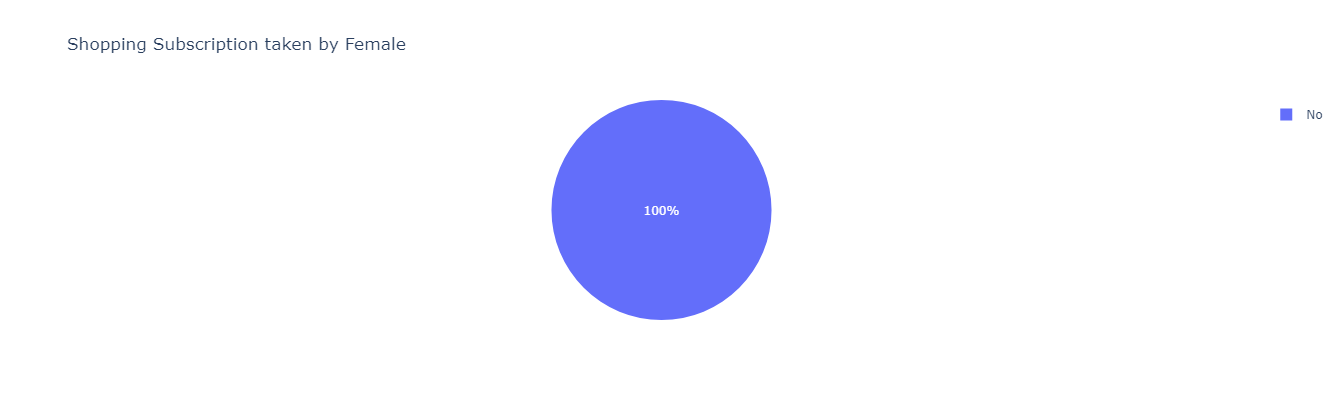

In [38]:
fig_pie1.show()

fig_pie2.show()


We can see that none of the Females have taken a Subscription

## Season

In [39]:
season_df1 = df[df['Season']=='Fall']
season_df2 = df[df['Season']=='Spring']
season_df3 = df[df['Season']=='Winter']
season_df4 = df[df['Season']=='Summer']

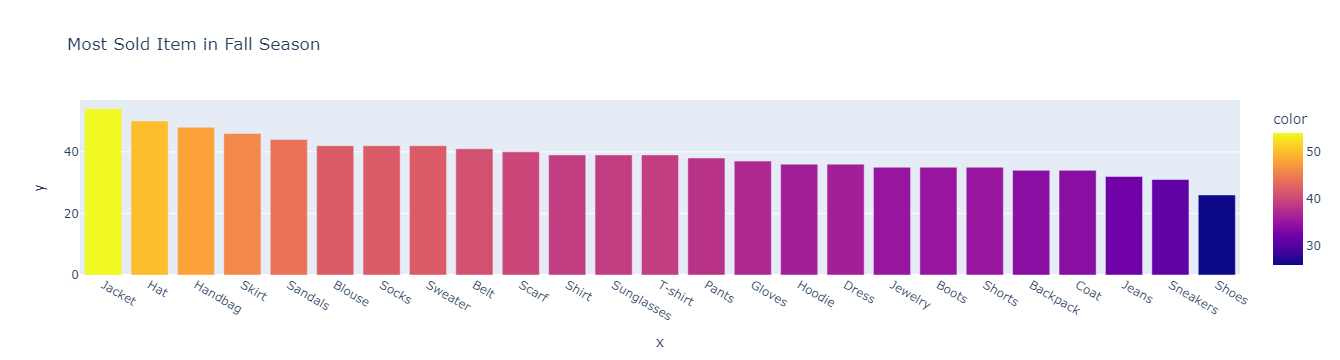

In [50]:
px.bar(x=dict(season_df1['Item Purchased'].value_counts()).keys(),y=dict(season_df1['Item Purchased'].value_counts()).values(),
       color=dict(season_df1['Item Purchased'].value_counts()).values(),title='Most Sold Item in Fall Season')

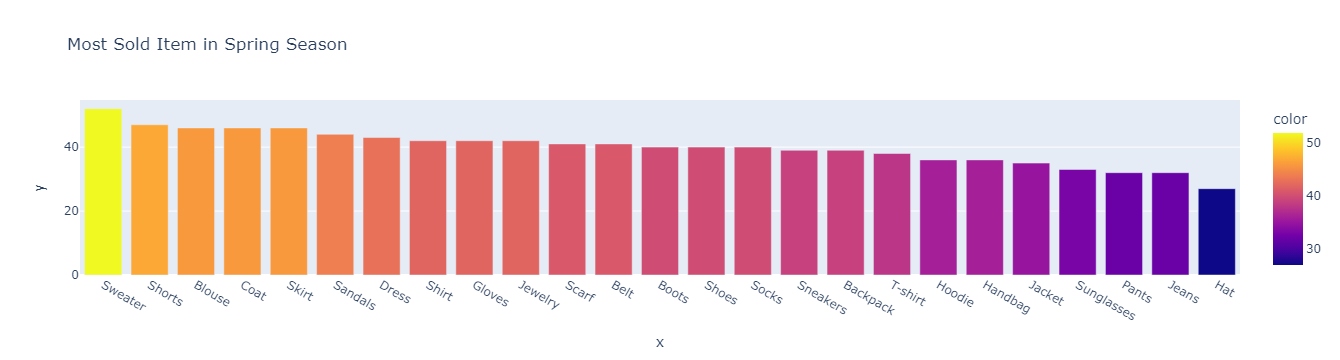

In [51]:
px.bar(x=dict(season_df2['Item Purchased'].value_counts()).keys(),y=dict(season_df2['Item Purchased'].value_counts()).values(),
       color=dict(season_df2['Item Purchased'].value_counts()).values(),title='Most Sold Item in Spring Season')

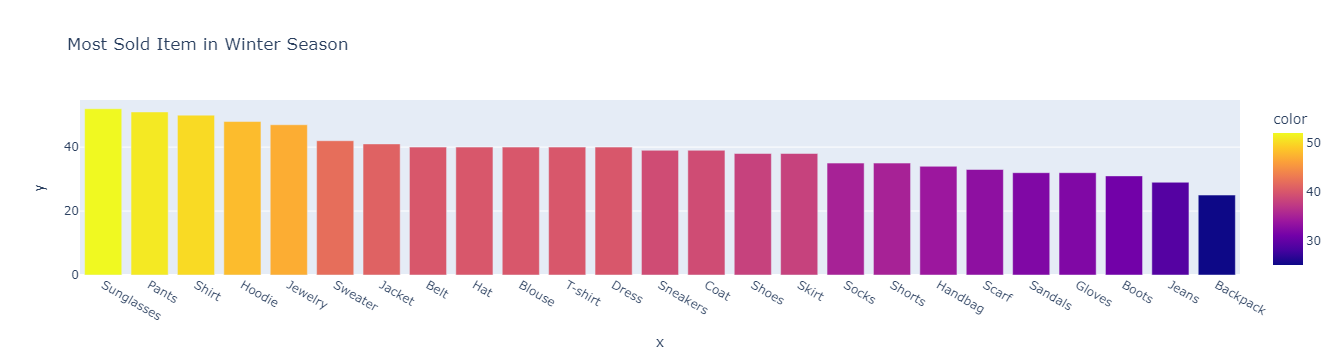

In [55]:
px.bar(x=dict(season_df3['Item Purchased'].value_counts()).keys(),y=dict(season_df3['Item Purchased'].value_counts()).values(),
       color=dict(season_df3['Item Purchased'].value_counts()).values(),title='Most Sold Item in Winter Season')

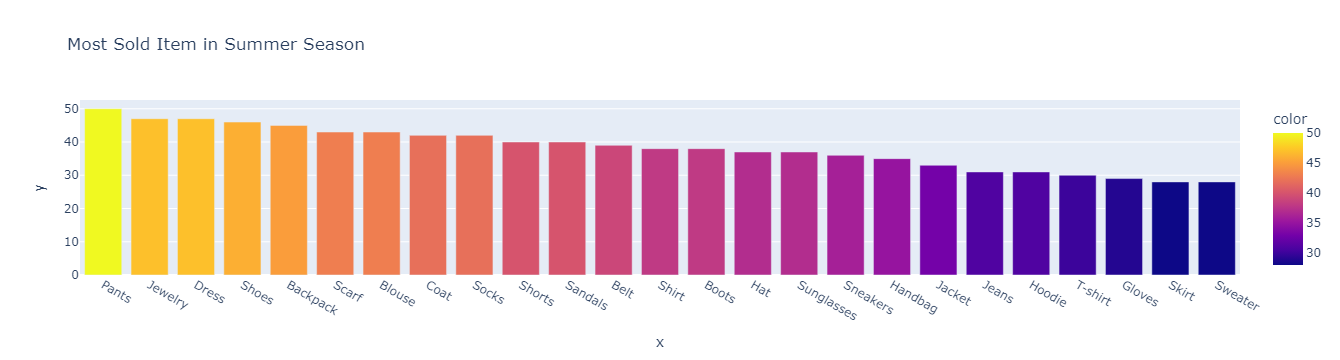

In [53]:
px.bar(x=dict(season_df4['Item Purchased'].value_counts()).keys(),y=dict(season_df4['Item Purchased'].value_counts()).values(),
       color=dict(season_df4['Item Purchased'].value_counts()).values(),title='Most Sold Item in Summer Season')

## Color

In [93]:
m_color = dict(male_df['Color'].value_counts())
f_color = dict(female_df["Color"].value_counts())
color = dict(df['Color'].value_counts())

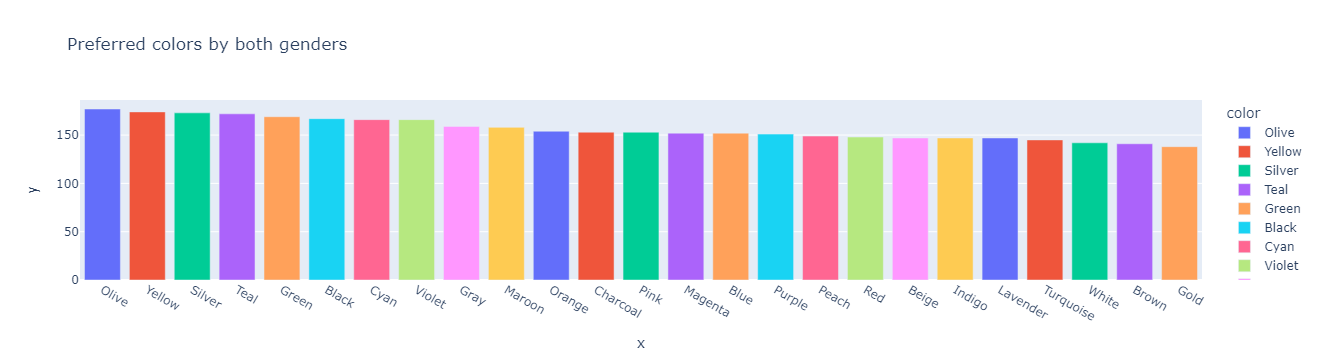

In [96]:
px.bar(x=color.keys(),y=color.values(),color=color.keys(),title='Preferred colors by both genders')

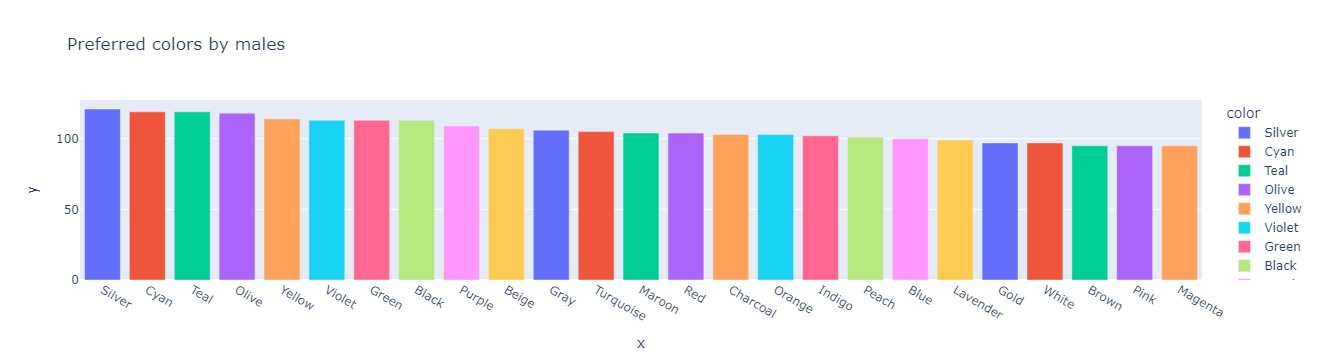

In [89]:
px.bar(y=m_color.values(),x=m_color.keys(),title="Preferred colors by males",color=m_color.keys())

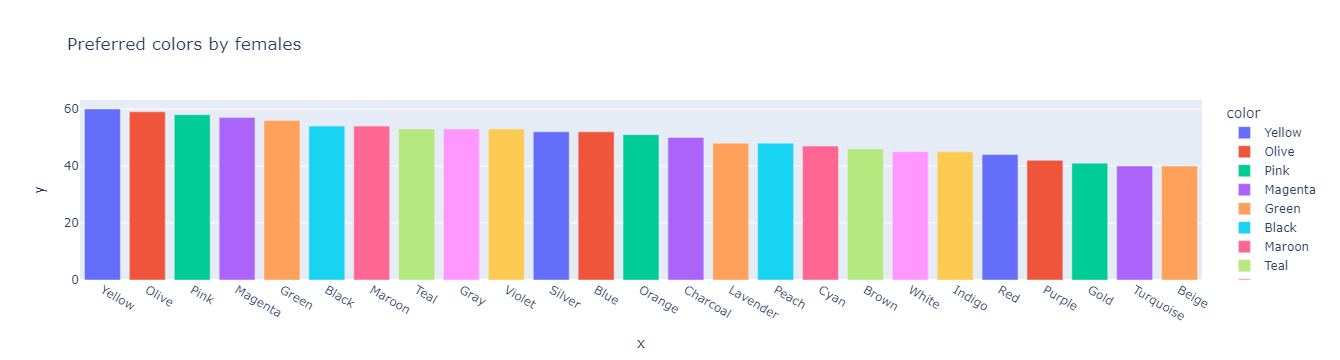

In [91]:
px.bar(y=f_color.values(),x=f_color.keys(),title="Preferred colors by females",color=f_color.keys())

## 

In [62]:
ppm = dict(df['Preferred Payment Method'].value_counts())
ppm

{'PayPal': 677,
 'Credit Card': 671,
 'Cash': 670,
 'Debit Card': 636,
 'Venmo': 634,
 'Bank Transfer': 612}

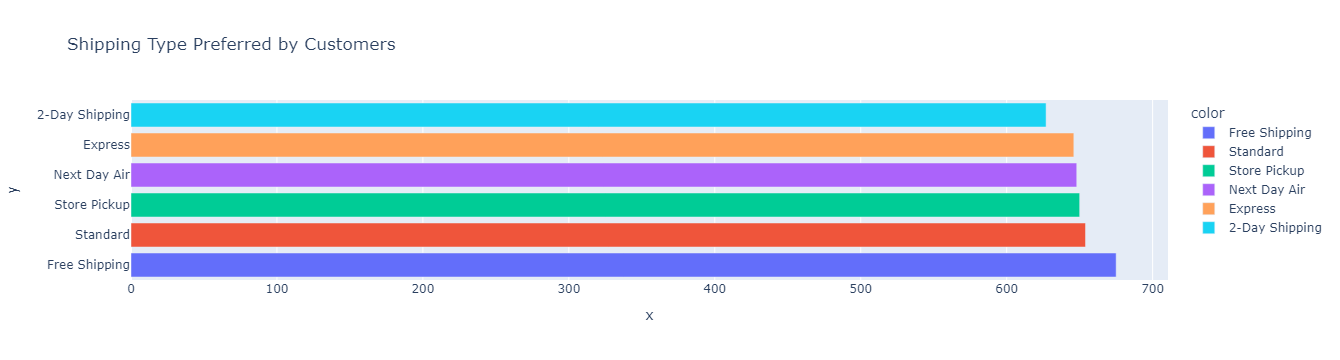

In [107]:
st = dict(df['Shipping Type'].value_counts())
px.bar(x=st.values(),y=st.keys(),title="Shipping Type Preferred by Customers",color=st.keys())

In [79]:
st

{'Free Shipping': 675,
 'Standard': 654,
 'Store Pickup': 650,
 'Next Day Air': 648,
 'Express': 646,
 '2-Day Shipping': 627}

In [81]:
pcu=dict(df['Promo Code Used'].value_counts())
pcu

{'No': 2223, 'Yes': 1677}

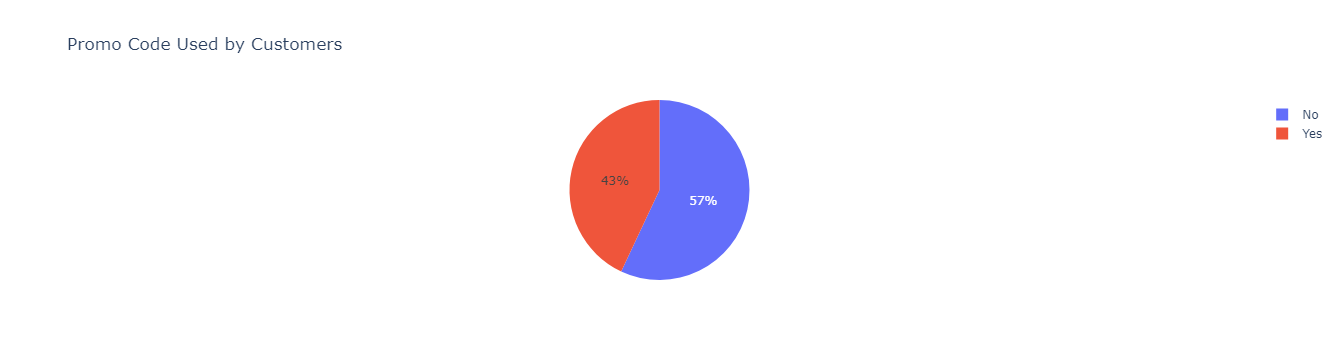

In [85]:
px.pie(values=pcu.values(),names=pcu.keys(),width=400,title="Promo Code Used by Customers")